# Regression - Predictive Analysis

This Python notebook analyses an online healthcare dataset conducting predictive analysis using regression. 

The comma separated value (CSV) file dataset contains individuals data described by columns age, sex, body mass index (BMI), number of children, smoker, region and health insurance charges. The dataset can be obtained from Kaggle using this link: https://www.kaggle.com/datasets/mirichoi0218/insurance

The objective is to use the data to create a supervised regression model to predict insurance charges based on a series of identified feature vectors. An example use case of this model could be to support a cost pricing model using big data 

The dataset is split into respective training, test and validation datasets for model training and evaluation. The hyperparameters .... 

The script concludes with running inference using random

In [51]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error , r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

## Data Exploration

The first 5 rows are shown below as a sample of the dataframe. 

In [52]:
df = pd.read_csv(r"insurance.csv")
print(df.head())
print('\n')
print('Length of the dataset is: ', len(df), 'entries')

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Length of the dataset is:  1338 entries


The below code checks if there are any nulls (invalid data entries) in the data. This could be empty cells or "not a number" (NaN) where it is expecting a numerical value.
The total number of invalid cells are shown to be 0.

In [53]:
print("Total number of invalid entries for each column:")
print(df.isnull().sum())

Total number of invalid entries for each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


The data is now visually explored using various Python libraries such as matplotlib, or seaborn.

The below scatter graph shows the insurance charges (y-axis) against the age. From this graph, there is a clear trend between age of the individual to total insurance charge. There also seems to be another trend in the data shown in the data influenced by other factors. 

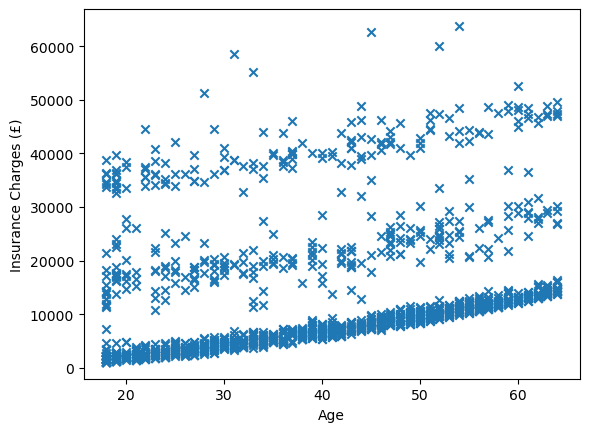

In [54]:
plt.figure("Age")
plt.scatter(df['age'], df['charges'], marker='x')
plt.xlabel("Age")
plt.ylabel("Insurance Charges (£)")
plt.show()

Plotting the same scatterplot, but separating the data by whether the individual is a smoker or not reveals an additional trend in the data. The insurance charges not only increases with age, but insurance charges also depends on whether the individual is a smoker. 

<AxesSubplot: xlabel='Age', ylabel='Insurance Charges (£)'>

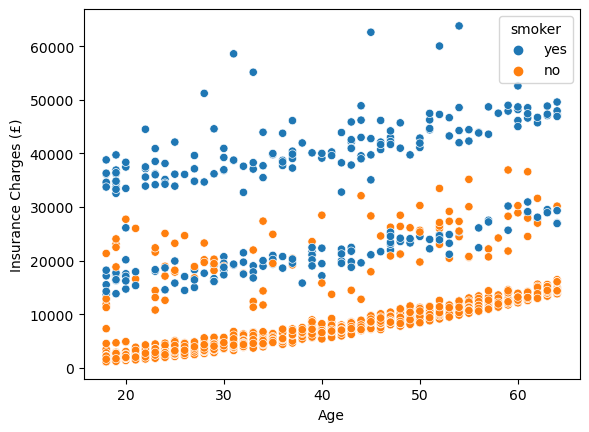

In [55]:
plt.xlabel("Age")
plt.ylabel("Insurance Charges (£)")
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

A boxplot of the insurance charges is shown for female and male respectively in the graph below. 

Text(0, 0.5, 'Insurance Charges (£)')

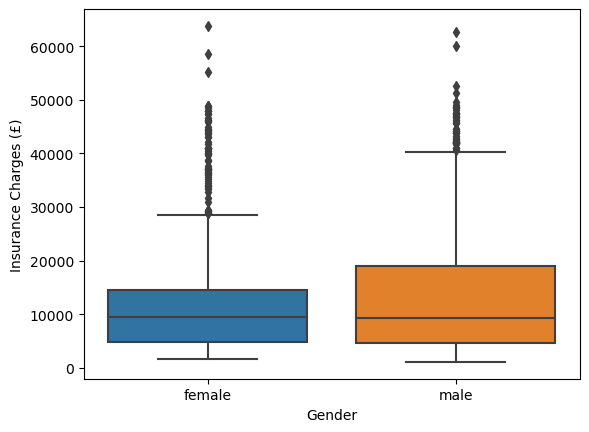

In [56]:
#Plot sex to charges - boxplot
plt.figure("Gender")
sns.boxplot(data=df, x='sex', y='charges')
plt.xlabel("Gender")
plt.ylabel("Insurance Charges (£)")

Describe the chart below. 

Text(0, 0.5, 'Insurance Charges (£)')

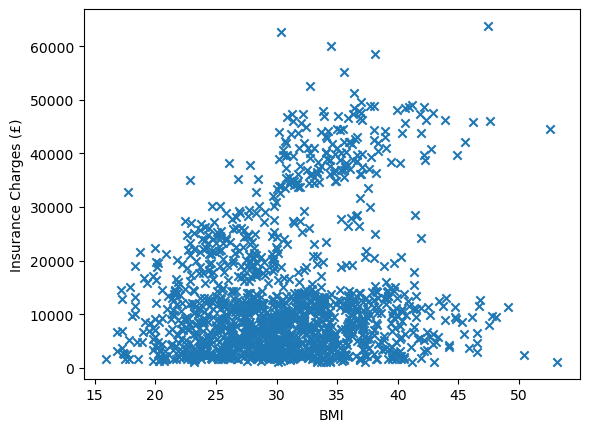

In [57]:
#Plot bmi to charges - scatter
plt.figure("BMI")
plt.scatter(df['bmi'], df['charges'], marker='x')
plt.xlabel("BMI")
plt.ylabel("Insurance Charges (£)")

Describe the chart below. 

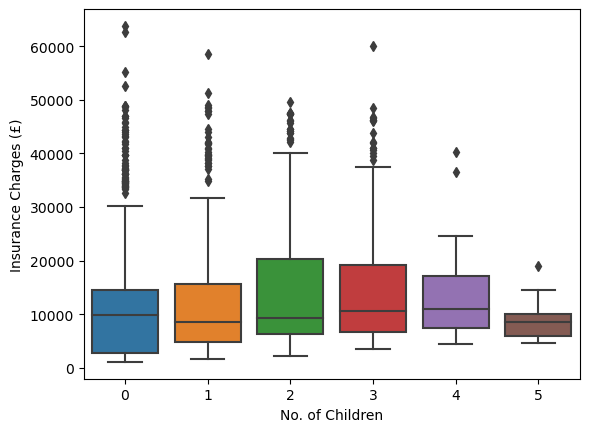

In [58]:
#Plot children to charges - 
plt.figure("Children")
sns.boxplot(data=df, x='children', y='charges')
plt.xlabel("No. of Children")
plt.ylabel("Insurance Charges (£)")
plt.show()

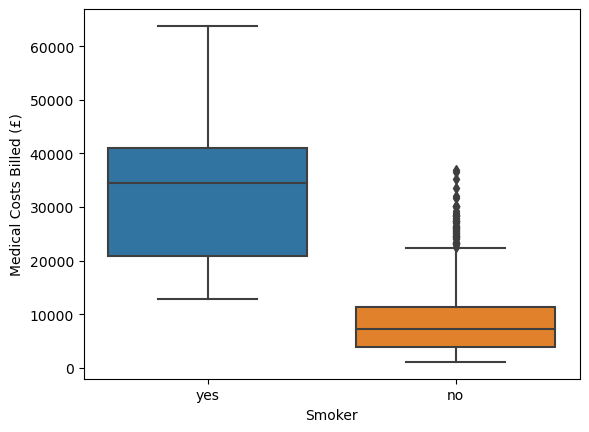

In [59]:
#Plot smoker to charges - histogram for smoker, histogram for non smoker
plt.figure("Smoker")
sns.boxplot(data=df, x='smoker', y='charges')
plt.xlabel("Smoker")
plt.ylabel("Medical Costs Billed (£)")
plt.show()

Text(0, 0.5, 'Medical Costs Billed (£)')

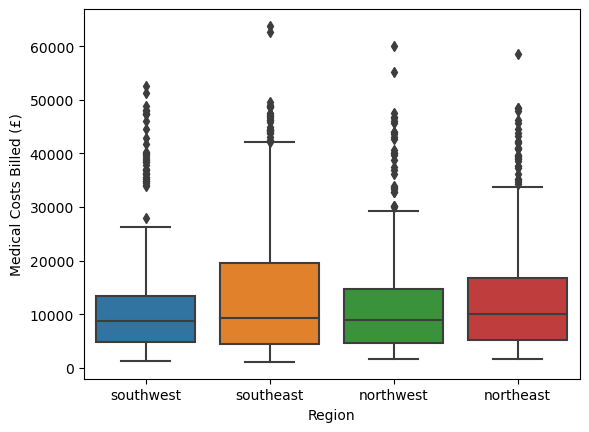

In [60]:





#Plot region to charges - scatter chart? 
plt.figure("Region")
sns.boxplot(data=df, x='region', y='charges')
plt.xlabel("Region")
plt.ylabel("Medical Costs Billed (£)")

## Data Cleaning

In [61]:
df['sex'].replace("male", 0, inplace=True)
df['sex'].replace("female", 1, inplace=True)
df['smoker']. replace("yes", 1, inplace=True)
df['smoker'].replace("no", 0, inplace=True)
df['region'].replace("northeast", 0, inplace=True)
df['region'].replace("northwest", 1, inplace=True)
df['region'].replace("southeast", 2, inplace=True)
df['region'].replace("southwest", 3, inplace=True)
print("Number of charges entries with 0 value: ", (df['charges']==0).sum())
print("Number of charges entries with null value: ")
print((df.isnull().sum()))
print("Dataframe cleaned ready to be used: ")
print(df.head())
plt.show()

Number of charges entries with 0 value:  0
Number of charges entries with null value: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Dataframe cleaned ready to be used: 
   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       3  16884.92400
1   18    0  33.770         1       0       2   1725.55230
2   28    0  33.000         3       0       2   4449.46200
3   33    0  22.705         0       0       1  21984.47061
4   32    0  28.880         0       0       1   3866.85520


Looking at the correlation - drop region. Give justification. 

In [62]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,-0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [63]:
X = df.drop(columns = ['charges', 'region'])
y = df['charges']

## Model Development

### Grid Search for Hyperparameters Optimisation

Dont just want to overfit the data since it is supervised learning - that's why need a train test val split of the dataset.
Also need a val set to - again dont want to overfit during this process so splitting this out too. 

In [64]:
#Get Training, Validation and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= 8) #Gives 10% test, 10% val, 80% train

One of the hyper parameters of regression - what degree of freedom to use? Could be linear, cubic relationship... 
The below uses GridSearch (a XXX tool) to find the best polynomial degrees to use for the model using the validation datasets (X_val and y_val).

In [65]:
##Grid search
param_grid = [{'poly__degree': [1, 2, 3, 4, 5]}]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('linear', LinearRegression())])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_val, y_val)
print("Best polynomial degrees to use is: ", grid_search.best_params_)

Best polynomial degrees to use is:  {'poly__degree': 2}


### Training the model

Describe the for loop - trying out different polynomials to evidence better relationship deteremined by polynomial degrees of 2. Show this is the case... 
Describe what the mean squared error is
mean absolute error is
R2 score... 
Uncomment the line of coefficients to see output of coefficients to polynomial equation of trend to determine 

In [66]:
n = 5 #max number of degrees in polynomial
for i in range(n):
    i=i+1
    print("No of degrees in polynomial: ", i)
    polynomial_feature = PolynomialFeatures(degree=i)
    X_poly = polynomial_feature.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.8, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= 8)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #print("Coefficients, n=", i, ": \n", model.coef_) #Uncomment this line out to print coefficients
    print("Mean squared error, n=", i, ": %.4f" % mean_squared_error(y_test, y_pred))
    print("Mean absolute error, n=", i, ": {:.4f}".format((mean_absolute_error(y_test, y_pred))))
    print("R2 Score, n=", i, ": %.4f" % r2_score(y_test, y_pred))
    print("*"*20)

No of degrees in polynomial:  1
Mean squared error, n= 1 : 24769482.2056
Mean absolute error, n= 1 : 3721.6339
R2 Score, n= 1 : 0.8342
********************
No of degrees in polynomial:  2
Mean squared error, n= 2 : 11648141.0110
Mean absolute error, n= 2 : 2198.1218
R2 Score, n= 2 : 0.9220
********************
No of degrees in polynomial:  3
Mean squared error, n= 3 : 14098686.3304
Mean absolute error, n= 3 : 2532.2258
R2 Score, n= 3 : 0.9056
********************
No of degrees in polynomial:  4
Mean squared error, n= 4 : 12144064.0929
Mean absolute error, n= 4 : 2246.3855
R2 Score, n= 4 : 0.9187
********************
No of degrees in polynomial:  5
Mean squared error, n= 5 : 12476466.0157
Mean absolute error, n= 5 : 2321.1488
R2 Score, n= 5 : 0.9165
********************


In [67]:
#Create polynomial degrees = 2 as optimal fit to data
polynomial_feature = PolynomialFeatures(degree=2)
X_poly = polynomial_feature.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= 8)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Inference

Using random input of feature vectors and predict insurance charges below. 

In [77]:
print("Choose any number better 0 and ", len(X_test)-1, "for inference from test dataset")
d = 49 #Change this number
model.predict(X_test[d])

Choose any number better 0 and  133 for inference from test dataset


ValueError: Expected 2D array, got 1D array instead:
array=[1.00000e+00 3.40000e+01 1.00000e+00 3.37000e+01 1.00000e+00 0.00000e+00
 1.15600e+03 3.40000e+01 1.14580e+03 3.40000e+01 0.00000e+00 1.00000e+00
 3.37000e+01 1.00000e+00 0.00000e+00 1.13569e+03 3.37000e+01 0.00000e+00
 1.00000e+00 0.00000e+00 0.00000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [71]:
X

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0
...,...,...,...,...,...
1333,50,0,30.970,3,0
1334,18,1,31.920,0,0
1335,18,1,36.850,0,0
1336,21,1,25.800,0,0


In [74]:
Age = 24
Sex = 0
BMI = 15
Children = 0
Smoker = 0
input_features = pd.DataFrame([Age, Sex, BMI, Children, Smoker])
polynomial_feature = PolynomialFeatures(degree=2)
X_poly = polynomial_feature.fit_transform(input_features)
print(input_features)
print(X_poly)
y_pred = model.predict(X_poly)

    0
0  24
1   0
2  15
3   0
4   0
[[  1.  24. 576.]
 [  1.   0.   0.]
 [  1.  15. 225.]
 [  1.   0.   0.]
 [  1.   0.   0.]]


ValueError: X has 3 features, but LinearRegression is expecting 21 features as input.

In [ ]:
input_
model.predict